In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a = -1
b = 2

X = np.linspace(0,20,41)
y = a* X + b

print(X)
print(y)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20. ]
[  2.    1.5   1.    0.5   0.   -0.5  -1.   -1.5  -2.   -2.5  -3.   -3.5
  -4.   -4.5  -5.   -5.5  -6.   -6.5  -7.   -7.5  -8.   -8.5  -9.   -9.5
 -10.  -10.5 -11.  -11.5 -12.  -12.5 -13.  -13.5 -14.  -14.5 -15.  -15.5
 -16.  -16.5 -17.  -17.5 -18. ]


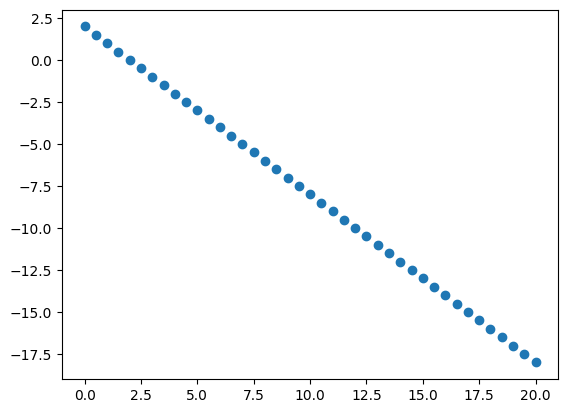

In [3]:
plt.scatter(X, y)
plt.show()

### Basic Gradient Descent

In [4]:
def GD(X, y, lr=0.001, epochs=1000, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    for i in range(epochs + 1):
        y_hat = theta0 + theta1 * X
        m = X.shape[0]

        cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
        grad0 = 1 / m * np.sum(y_hat - y)
        grad1 = 1 / m * np.sum((y_hat - y) * X)

        if show_progress:
            print(f"Epoch {i}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        theta0 -= lr * grad0
        theta1 -= lr * grad1

        theta0s.append(theta0)
        theta1s.append(theta1)
        costs.append(cost)

        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score*100)

        if convergence and i > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = i

    return history

In [5]:
history = GD(X, y, lr=0.01, epochs=1000, show_progress=False)

In [6]:
history["scores"][-1]

99.89010012073139

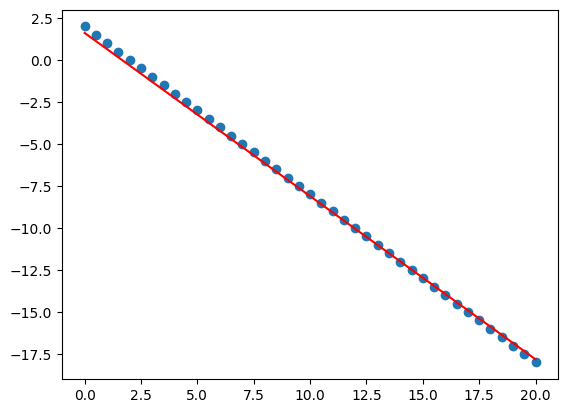

In [7]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

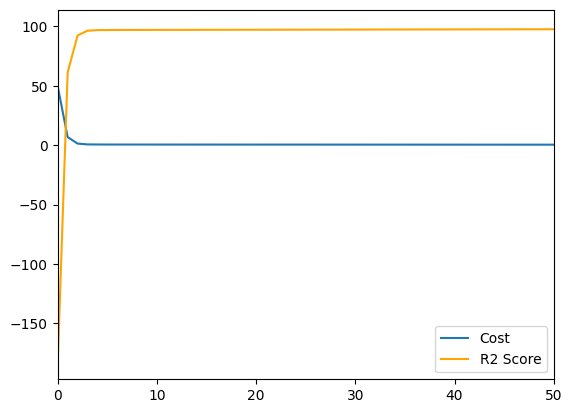

In [8]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.xlim(0, 50)
plt.legend(["Cost", "R2 Score"], loc = "lower right" )

plt.show()

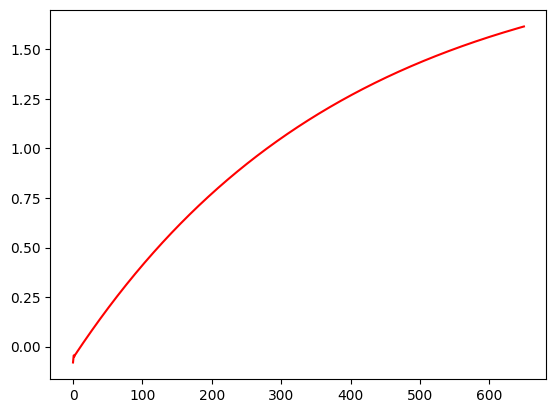

In [9]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

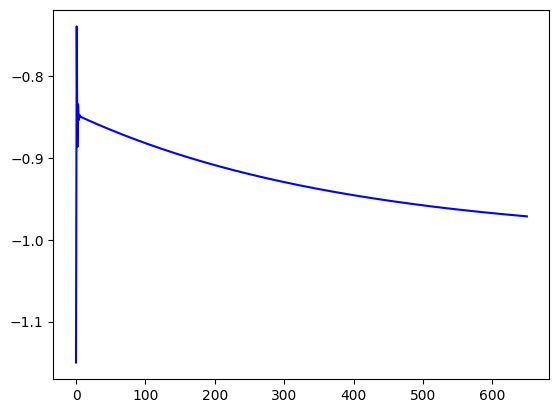

In [10]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

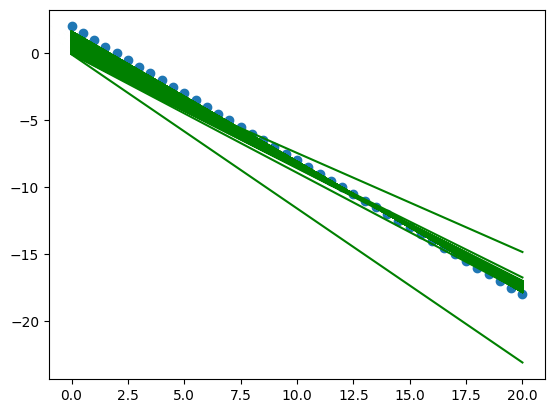

In [11]:
for i in range(epochs.shape[0]):
    y_hat = history["theta0s"][i] + history["theta1s"][i] * X
    plt.plot(X,y_hat, color = "green")
plt.scatter(X,y)
plt.show()

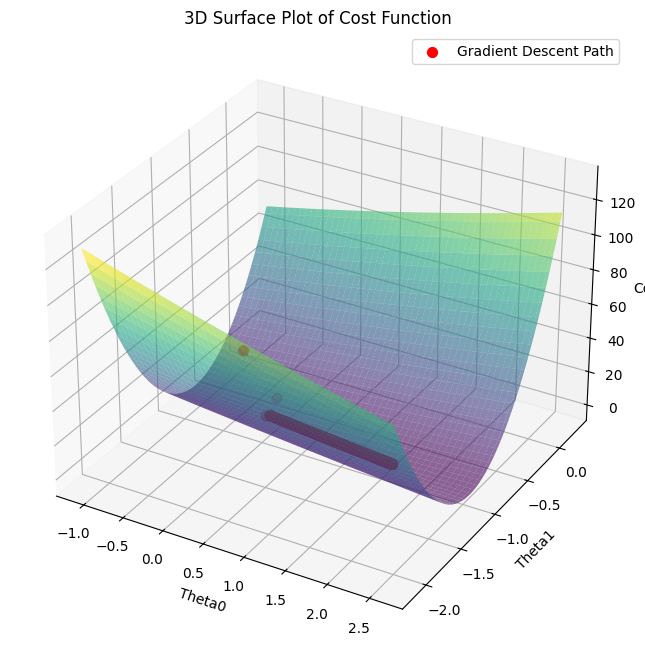

In [12]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

### Implementation of Momentum-Based GD

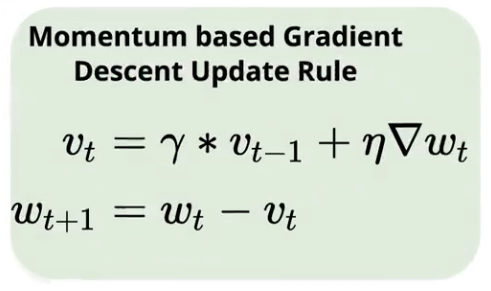

#### γ takes values between 0 and 1.
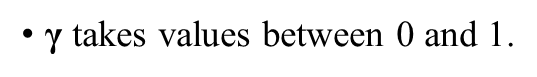

In [13]:
def GD_Momentum(X, y, lr=0.001, epochs=1000, Momentum=0, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    v0 = v1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    
    for i in range(epochs + 1):
        y_hat = theta0 + theta1 * X
        m = X.shape[0]

        cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
        grad0 = 1 / m * np.sum(y_hat - y)
        grad1 = 1 / m * np.sum((y_hat - y) * X)
        
        v0 = Momentum * v0 + lr * grad0
        v1 = Momentum * v1 + lr * grad1
        
        theta0 -= v0
        theta1 -= v1
        
        if show_progress:
            print(f"Epoch {i}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        theta0s.append(theta0)
        theta1s.append(theta1)
        costs.append(cost)

        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score * 100)

        if convergence and i > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = i

    return history

In [14]:
history = GD_Momentum(X, y, lr=0.01, epochs=1000, Momentum=0.6, show_progress=False )

In [15]:
history["scores"][-1]

99.9568251598842

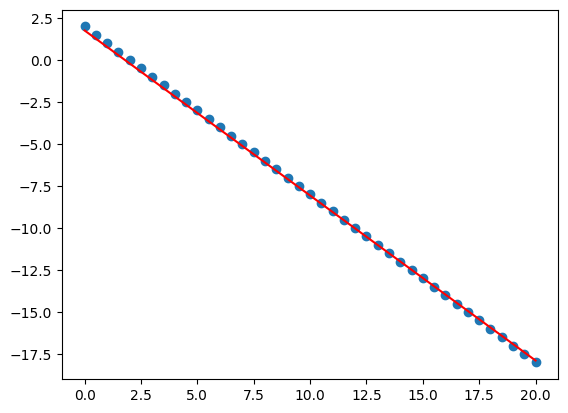

In [16]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

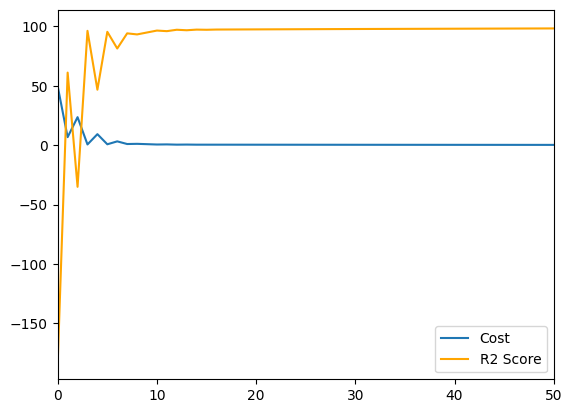

In [17]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.xlim(0, 50)
plt.legend(["Cost", "R2 Score"], loc = "lower right" )

plt.show()

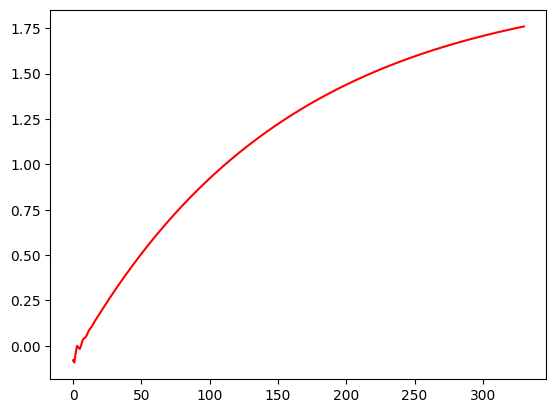

In [18]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

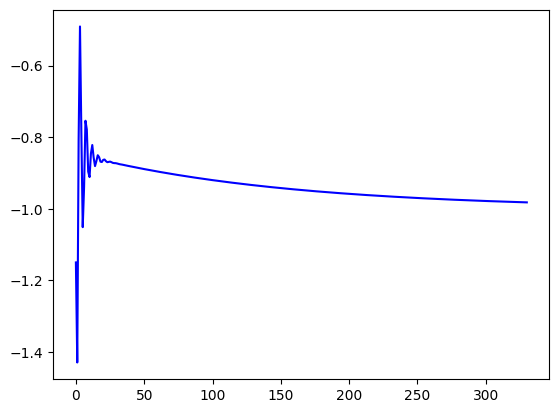

In [19]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

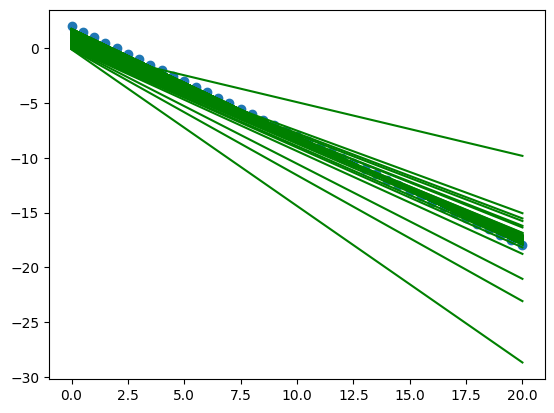

In [20]:
for i in range(epochs.shape[0]):
    y_hat = history["theta0s"][i] + history["theta1s"][i] * X
    plt.plot(X,y_hat, color = "green")
plt.scatter(X,y)
plt.show()

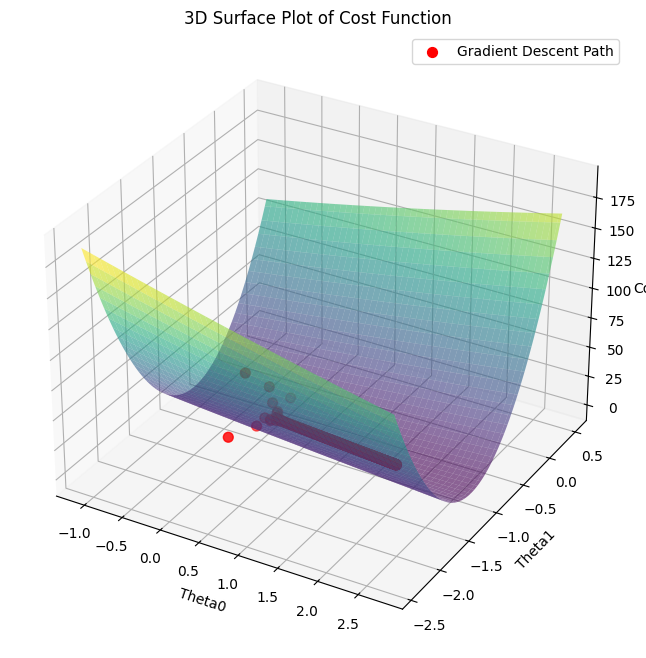

In [21]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

__Different Momentum values__

In [23]:
history0 = GD_Momentum(X, y, lr=0.01, epochs=300, Momentum=0, show_progress=False)
history1 = GD_Momentum(X, y, lr=0.01, epochs=300, Momentum=0.99, show_progress=False)
history2 = GD_Momentum(X, y, lr=0.01, epochs=300, Momentum=0.5, show_progress=False)

In [24]:
r0 = history0["scores"][-1]
r1 = history1["scores"][-1]
r2 = history2["scores"][-1]
print(f" R2 Score for momentum equale 0 = {r0}")
print(f" R2 Score for momentum equale 0.99 = {r1}")
print(f" R2 Score for momentum equale 0.5 = {r2}")

 R2 Score for momentum equale 0 = 99.33032459185854
 R2 Score for momentum equale 0.99 = 93.096248919544
 R2 Score for momentum equale 0.5 = 99.8591068178781


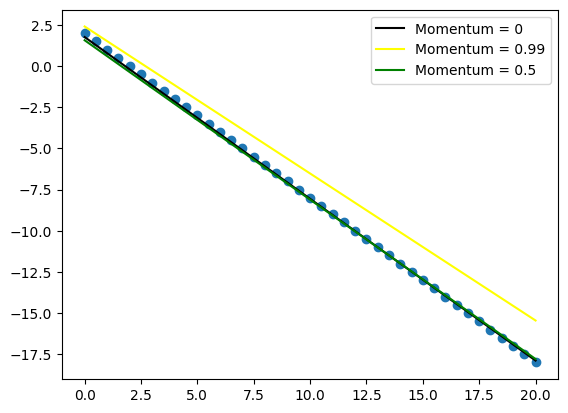

In [25]:
y_hat0 = history["optimal_theta0"] + history["optimal_theta1"] * X
y_hat1 = history1["optimal_theta0"] + history1["optimal_theta1"] * X
y_hat2 = history2["optimal_theta0"] + history2["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat0, color = "black", label = "Momentum = 0")
plt.plot(X,y_hat1, color = "yellow", label = "Momentum = 0.99")
plt.plot(X,y_hat2, color = "green", label = "Momentum = 0.5")
plt.legend()
plt.show()

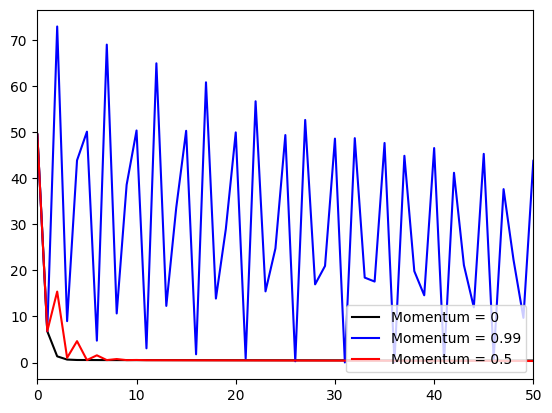

In [26]:
epochs = np.linspace(0, history0["convergence_epoch"], history0["convergence_epoch"] + 1)

plt.plot(epochs, history0["costs"], label = "Momentum = 0", color = "black")
plt.plot(epochs, history1["costs"], label = "Momentum = 0.99", color = "blue")
plt.plot(epochs, history2["costs"] , label = "Momentum = 0.5", color = "red")

plt.xlim(0, 50)
plt.legend(loc = "lower right" )

plt.show()

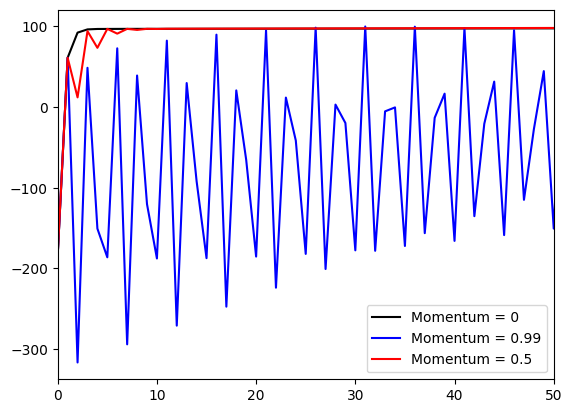

In [27]:
epochs = np.linspace(0, history0["convergence_epoch"], history0["convergence_epoch"] + 1)

plt.plot(epochs, history0["scores"] ,label = "Momentum = 0", color = "black")
plt.plot(epochs, history1["scores"] ,color = "blue",label = "Momentum = 0.99" )
plt.plot(epochs, history2["scores"],  label = "Momentum = 0.5", color = "red" )

plt.xlim(0, 50)
plt.legend(loc = "lower right" )

plt.show()

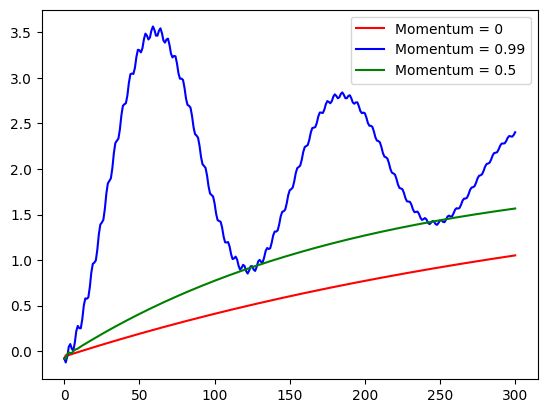

In [28]:
plt.plot(epochs, history0["theta0s"] ,color = "red", label = "Momentum = 0" )
plt.plot(epochs, history1["theta0s"] ,color = "blue", label = "Momentum = 0.99" )
plt.plot(epochs, history2["theta0s"] ,color = "green", label = "Momentum = 0.5" )
plt.legend()
plt.show()

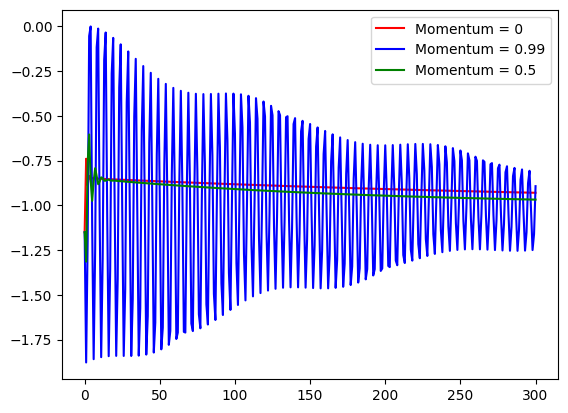

In [29]:
plt.plot(epochs, history0["theta1s"] ,color = "red", label = "Momentum = 0" )
plt.plot(epochs, history1["theta1s"] ,color = "blue", label = "Momentum = 0.99" )
plt.plot(epochs, history2["theta1s"] ,color = "green", label = "Momentum = 0.5" )
plt.legend()
plt.show()

In [30]:
histories = [history0, history1, history2]

def plot_cost_histories(histories, X, y):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")
    colors = ["red", "blue", "green"]

    theta0_vals = np.linspace(min(min(h["theta0s"]) for h in histories) - 1, 
                              max(max(h["theta0s"]) for h in histories) + 1, 100)
    theta1_vals = np.linspace(min(min(h["theta1s"]) for h in histories) - 1, 
                              max(max(h["theta1s"]) for h in histories) + 1, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
    cost_grid = np.zeros_like(theta0_grid)
    
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
            cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)
    
    ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
    
    for idx, history in enumerate(histories):
        ax.scatter(history["theta0s"], history["theta1s"], history["costs"], 
                   color=colors[idx % len(colors)], s=50, label=f"Gradient Descent Path {idx+1}")
    
    ax.set_xlabel("Theta0")
    ax.set_ylabel("Theta1")
    ax.set_zlabel("Cost")
    ax.set_title("3D Surface Plot of Cost Function")
    ax.legend()
    plt.show()

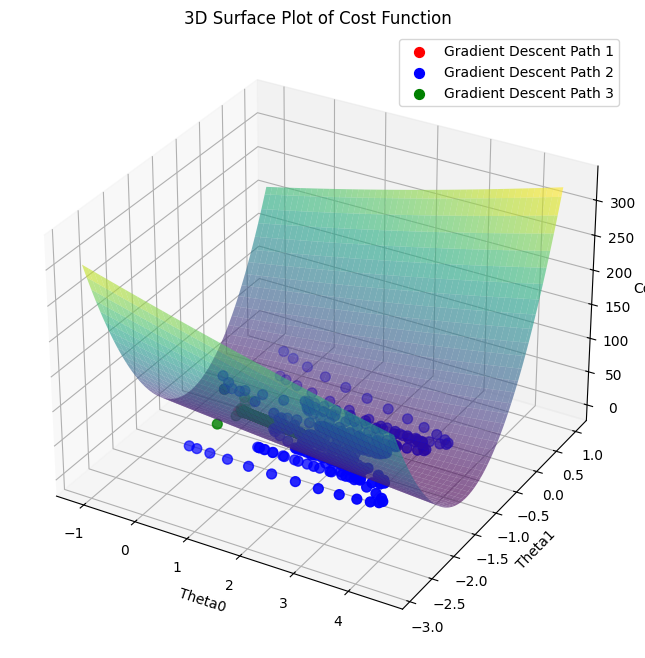

In [31]:
plot_cost_histories(histories, X, y)

### Implementation of AdaGrad

![GD with AdaGrad](adagrad.PNG)

In [32]:
def GD_Adagrad(X, y, lr=0.001, epochs=1000, epsilon=1e-8, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    G0 = G1 = 0 
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    
    for i in range(epochs + 1):
        y_hat = theta0 + theta1 * X
        m = X.shape[0]

        cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
        grad0 = 1 / m * np.sum(y_hat - y)
        grad1 = 1 / m * np.sum((y_hat - y) * X)
        
        G0 += grad0 ** 2
        G1 += grad1 ** 2
        
        theta0 -= (lr / (np.sqrt(G0) + epsilon)) * grad0
        theta1 -= (lr / (np.sqrt(G1) + epsilon)) * grad1
        
        if show_progress:
            print(f"Epoch {i}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        theta0s.append(theta0)
        theta1s.append(theta1)
        costs.append(cost)

        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score * 100)

        if convergence and i > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = i

    return history


In [33]:
history = GD_Adagrad(X, y, lr=0.001, epochs=10000000, convergence= 1e-5, show_progress=False)

In [34]:
history["scores"][-1]

90.14511822121595

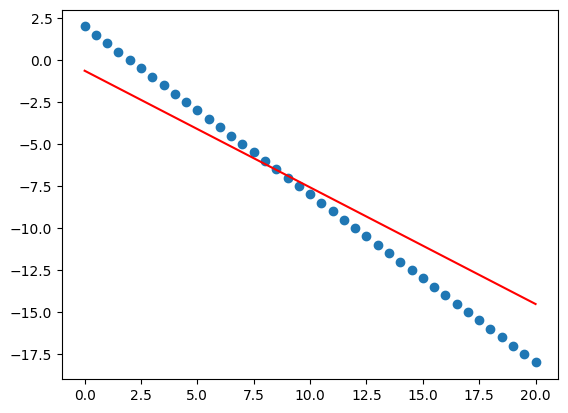

In [35]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

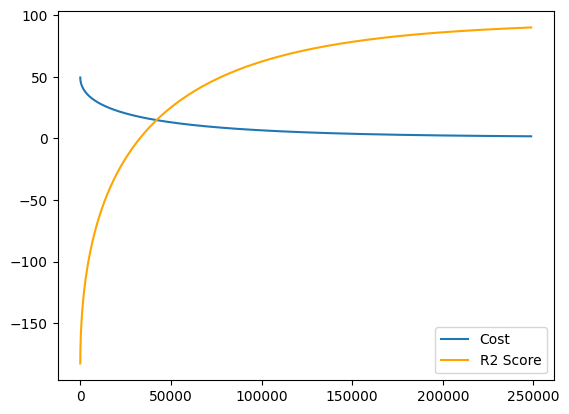

In [36]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.legend(["Cost", "R2 Score"], loc = "lower right" )

plt.show()

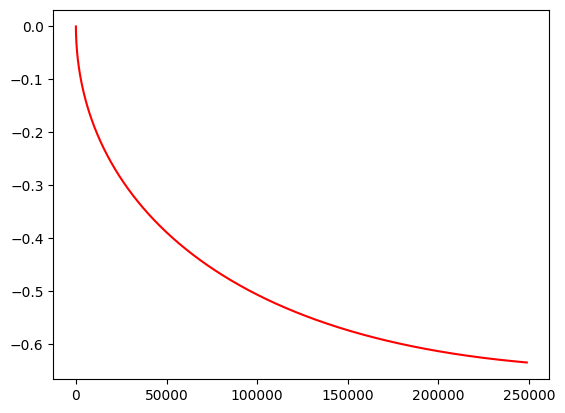

In [37]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

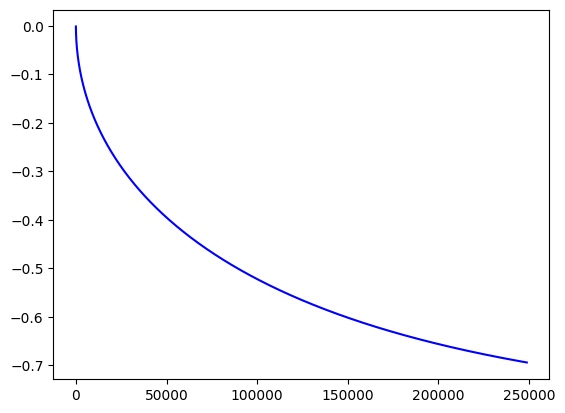

In [38]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

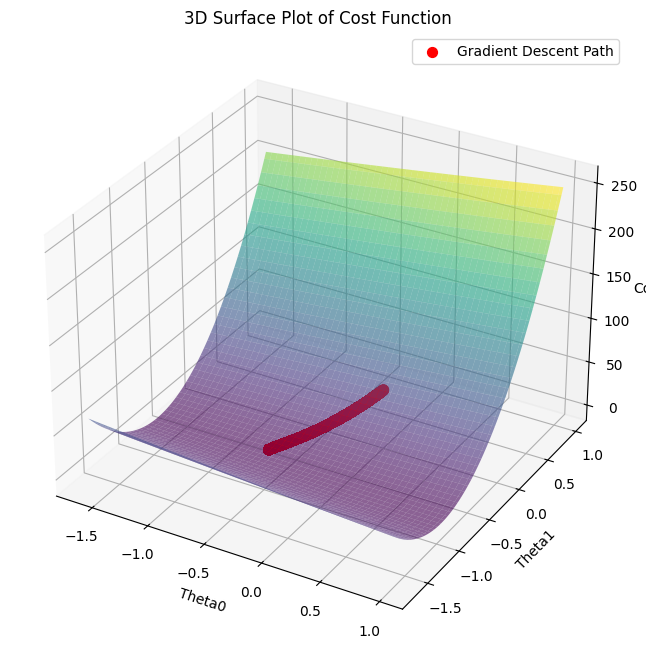

In [39]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

### Implementation of RMSProp 

![GD with RMSProp](rmsprob.PNG)

In [40]:
def GD_RMSProp(X, y, lr=0.001, epochs=1000, beta=0.9, epsilon=1e-8, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    G0 = G1 = 0 
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    
    for i in range(epochs + 1):
        y_hat = theta0 + theta1 * X
        m = X.shape[0]

        cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
        grad0 = 1 / m * np.sum(y_hat - y)
        grad1 = 1 / m * np.sum((y_hat - y) * X)
        
        G0 = beta * G0 + (1 - beta) * grad0 ** 2
        G1 = beta * G1 + (1 - beta) * grad1 ** 2
        
        theta0 -= (lr / (np.sqrt(G0) + epsilon)) * grad0
        theta1 -= (lr / (np.sqrt(G1) + epsilon)) * grad1
        
        if show_progress:
            print(f"Epoch {i}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        theta0s.append(theta0)
        theta1s.append(theta1)
        costs.append(cost)

        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score * 100)

        if convergence and i > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = i

    return history

In [41]:
history = GD_RMSProp(X, y, lr=0.001, epochs=10000, convergence= 1e-5, show_progress=False)

In [42]:
history["scores"][-1]

99.99813963982619

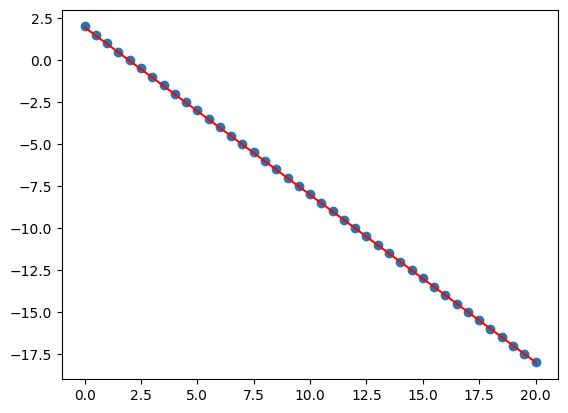

In [43]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

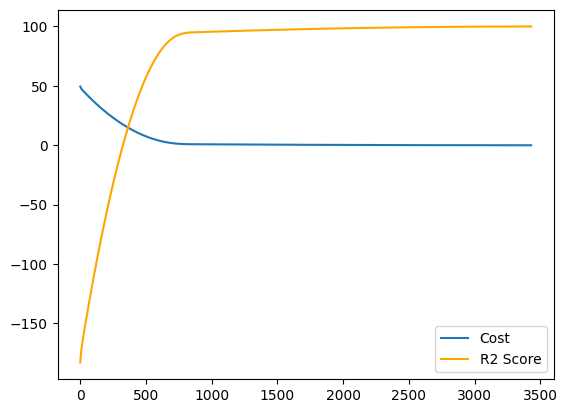

In [44]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.legend(["Cost", "R2 Score"], loc = "lower right" )

plt.show()

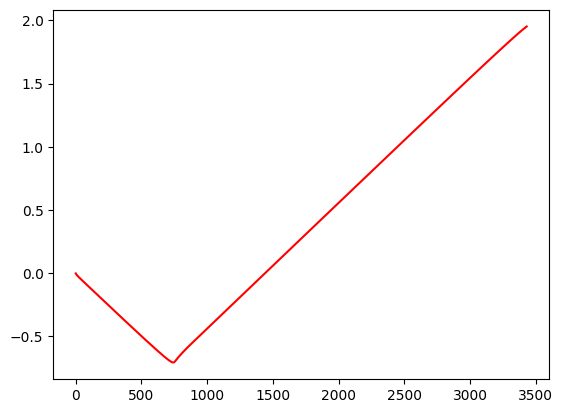

In [45]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

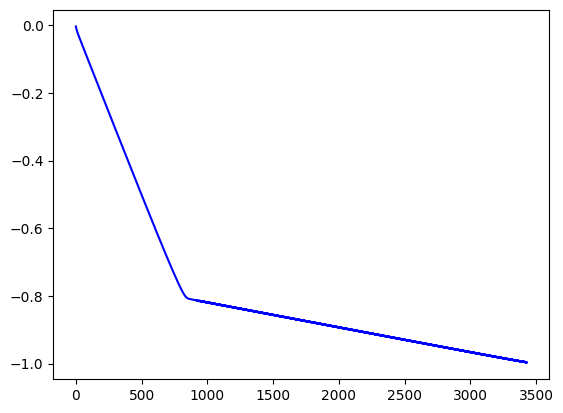

In [46]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

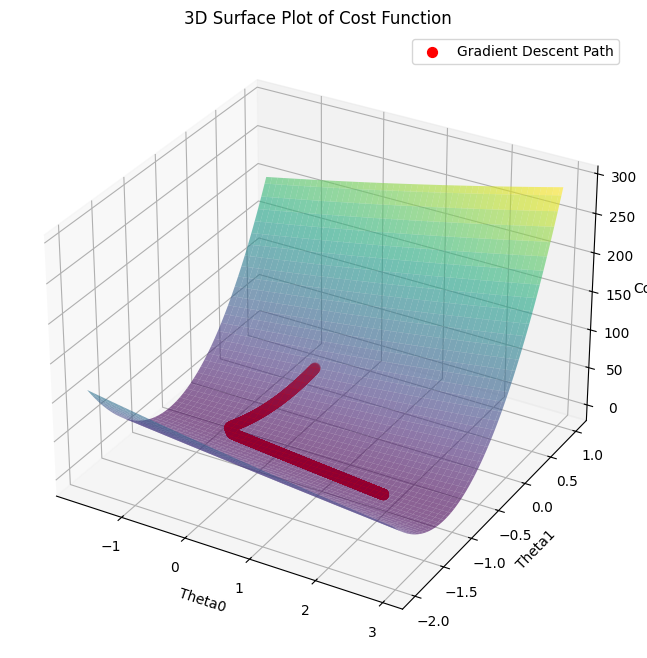

In [47]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

### Implementation to be ADAM

<img src="adam.PNG" alt="GD with ADAM" width="800"/>


In [48]:
def GD_ADAM(X, y, lr=0.001, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    m0 = m1 = 0
    v0 = v1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    
    for i in range(1, epochs + 1):
        y_hat = theta0 + theta1 * X
        m = X.shape[0]

        cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
        grad0 = 1 / m * np.sum(y_hat - y)
        grad1 = 1 / m * np.sum((y_hat - y) * X)
        
        m0 = beta1 * m0 + (1 - beta1) * grad0
        m1 = beta1 * m1 + (1 - beta1) * grad1
        
        v0 = beta2 * v0 + (1 - beta2) * (grad0 ** 2)
        v1 = beta2 * v1 + (1 - beta2) * (grad1 ** 2)
        
        m0_hat = m0 / (1 - beta1 ** i)
        m1_hat = m1 / (1 - beta1 ** i)
        v0_hat = v0 / (1 - beta2 ** i)
        v1_hat = v1 / (1 - beta2 ** i)
        
        theta0 -= (lr / (np.sqrt(v0_hat) + epsilon)) * m0_hat
        theta1 -= (lr / (np.sqrt(v1_hat) + epsilon)) * m1_hat
        
        if show_progress:
            print(f"Epoch {i}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        theta0s.append(theta0)
        theta1s.append(theta1)
        costs.append(cost)

        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score * 100)

        if convergence and i > 1 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = i

    return history

In [49]:
history = GD_ADAM(X, y, lr=0.001, epochs=10000, show_progress=False)

In [50]:
history["scores"][-1]

99.506120444041

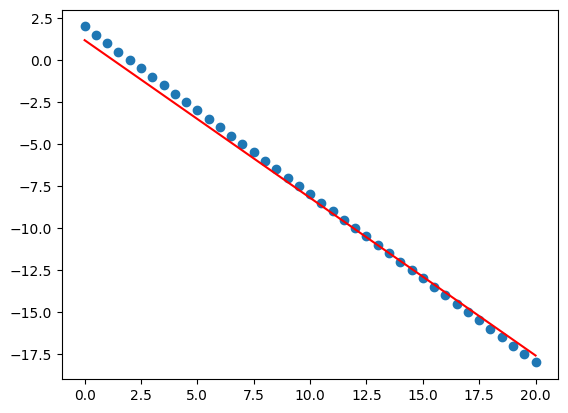

In [51]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

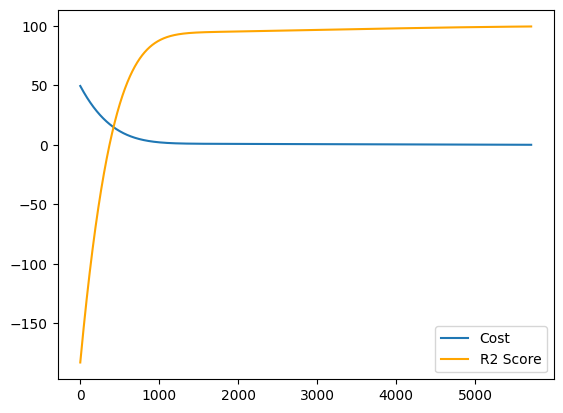

In [52]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] )

plt.plot(epochs, history["costs"] )
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.legend(["Cost", "R2 Score"], loc = "lower right" )

plt.show()

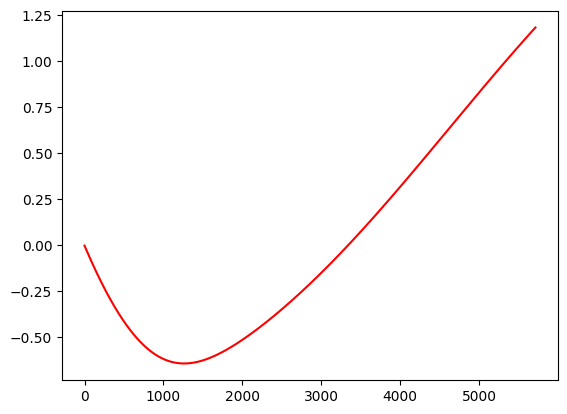

In [53]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

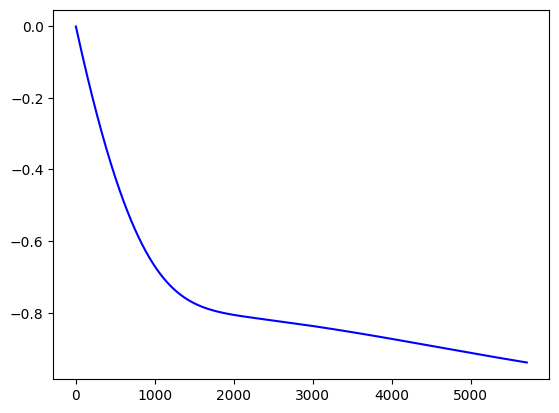

In [54]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

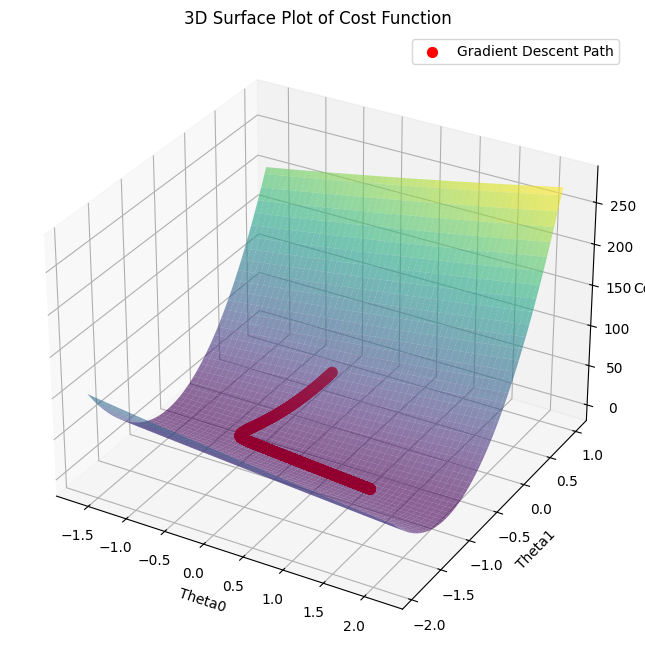

In [55]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()